In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

Customer Segmentation Clustering task \
Dataset Source: https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering

In [ ]:
data = pd.read_csv('customer_segmentation.csv')

In [40]:
data

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,88,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,0


In [3]:
data.shape

(2240, 29)

In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.Year_Birth.unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989,
       1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955,
       1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953,
       1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [9]:
# Looks like the Year_Birth column has some wrong values!
data[data.Year_Birth < 1940]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


In [10]:
# Looks like the income column has an outlier
data.Income.idxmax()

2233

In [16]:
# Drop these indexes
data.drop(index=[2233,192,239,339], inplace=True)

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
cols_list = [ 'Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Response']

In [17]:
data = data[cols_list]

In [18]:
df = pd.get_dummies(data, drop_first=True, dtype='int')

https://www.datacamp.com/tutorial/k-means-clustering-python

In [19]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,0.150542
std,11.701599,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,0.357683
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000
50%,1970.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,1.000000


In [21]:
X = df.drop(columns='Response')
y = df['Response']

In [22]:
# Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
# Initialize the kmeans model with 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [24]:
kmeans.cluster_centers_

array([[ 0.08098159, -0.54330723,  0.39425923,  0.14202644, -0.02519002,
        -0.49355037, -0.48186932, -0.54407116, -0.50598718, -0.48287779,
        -0.37552504],
       [-0.14663121,  0.98375197, -0.71387472, -0.2571635 ,  0.04561091,
         0.89365854,  0.87250798,  0.9851352 ,  0.91617755,  0.87433399,
         0.67995322]])

In [25]:
# Gives you the name / label of the cluster to which it belongs
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

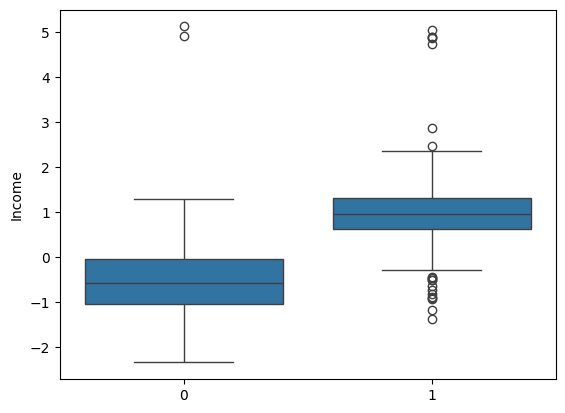

In [26]:
sns.boxplot(data=X_scaled, y='Income', x=kmeans.labels_);

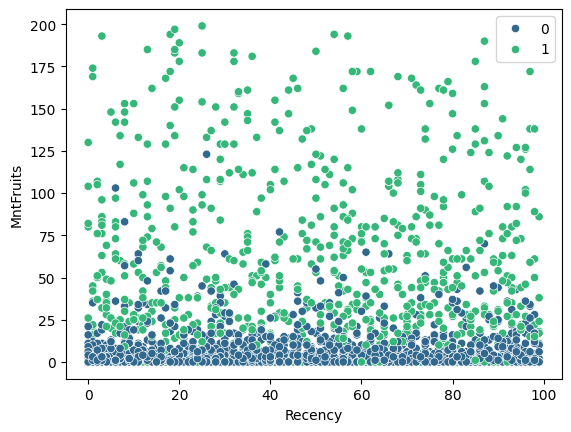

In [27]:
sns.scatterplot(data = X, x = 'Recency', y = 'MntFruits', hue = kmeans.labels_, palette='viridis');

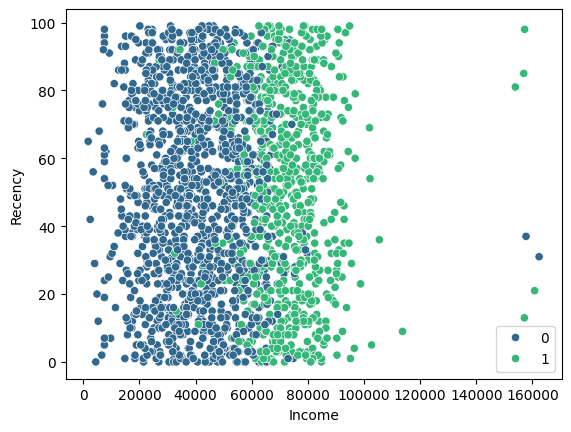

In [28]:
sns.scatterplot(data = X, x = 'Income', y = 'Recency', hue = kmeans.labels_, palette='viridis');

In [29]:
# Let's try to see the Responses column for each data v/s K Means labels for each of those rows.
summary = pd.concat([pd.Series(kmeans.labels_, name='Cluster'), y.reset_index(drop=True)], axis=1)

In [30]:
summary.groupby('Cluster').value_counts()

Cluster  Response
0        0           1276
         1            149
1        0            603
         1            184
Name: count, dtype: int64

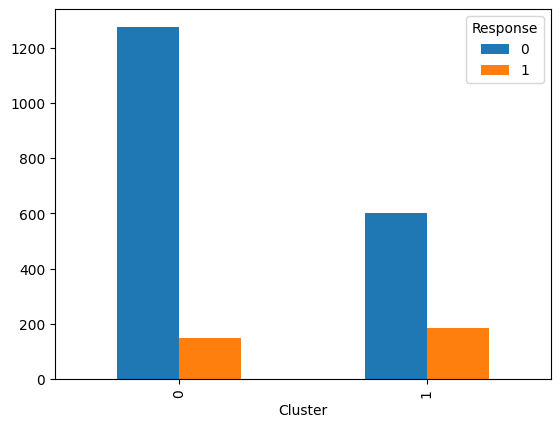

In [31]:
summary = summary.value_counts().reset_index()
pivoted = summary.pivot(index='Cluster',columns='Response',values='count')
pivoted.plot(kind='bar');

How to choose the K Value for K-Means?

In [32]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[24332.00000000004,
 16804.220570405043,
 14453.312690664216,
 13251.002031525453,
 12325.769877635565,
 11665.39306770636,
 11232.877342699563,
 10796.134182447058,
 10382.06348423161,
 10269.023591751498]

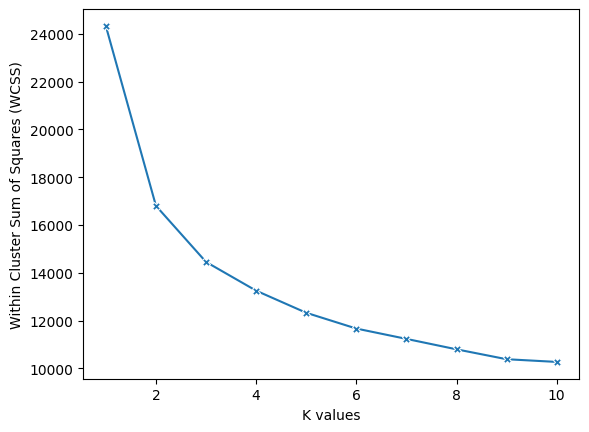

In [34]:
sns.lineplot(x=list(range(1,11)), y=wcss, marker='X')
plt.xlabel('K values')
plt.ylabel('Within Cluster Sum of Squares (WCSS)');

The 'elbow' of the curve indicates that best value of k = 3. Let's try using this

In [35]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

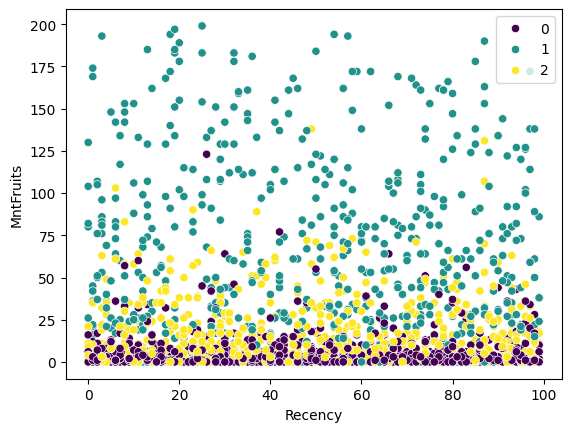

In [36]:
sns.scatterplot(data = X, x = 'Recency', y = 'MntFruits', hue = kmeans.labels_, palette='viridis');

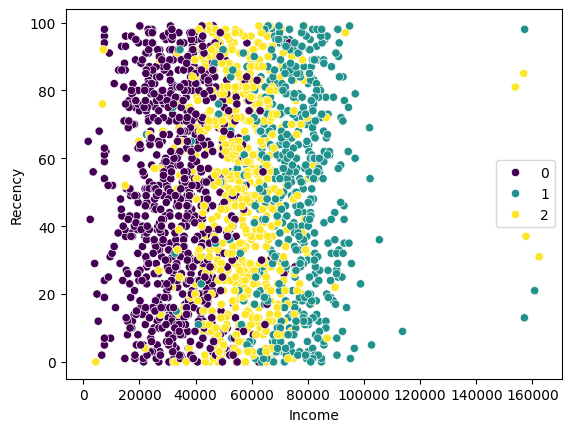

In [37]:
sns.scatterplot(data = X, x= 'Income', y = 'Recency', hue = kmeans.labels_, palette='viridis');

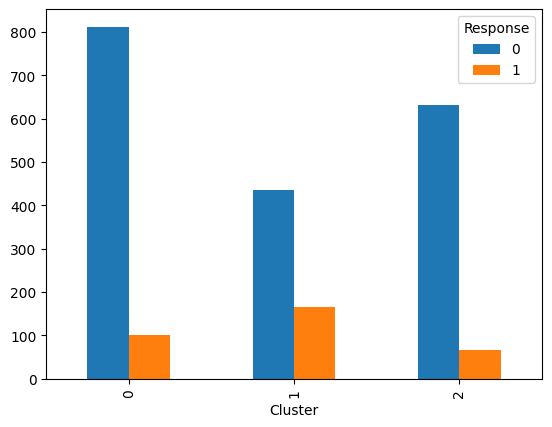

In [38]:
summary = pd.concat([pd.Series(kmeans.labels_, name='Cluster'), y.reset_index(drop=True)], axis=1)
summary = summary.value_counts().reset_index()
pivoted = summary.pivot(index='Cluster',columns='Response',values='count')
pivoted.plot(kind='bar');

In [39]:
# Get the cluster details:
for i in range(0,3):
  print('Centroid of Cluster : ', i)
  print(list(zip(X.columns, np.round(kmeans.cluster_centers_[i],decimals=3))))

Centroid of Cluster :  0
[('Year_Birth', 0.413), ('Income', -0.866), ('Kidhome', 0.895), ('Teenhome', -0.281), ('Recency', -0.006), ('MntWines', -0.759), ('MntFruits', -0.517), ('MntMeatProducts', -0.61), ('MntFishProducts', -0.541), ('MntSweetProducts', -0.518), ('MntGoldProds', -0.521)]
Centroid of Cluster :  1
[('Year_Birth', -0.012), ('Income', 1.08), ('Kidhome', -0.711), ('Teenhome', -0.509), ('Recency', 0.034), ('MntWines', 0.881), ('MntFruits', 1.118), ('MntMeatProducts', 1.243), ('MntFishProducts', 1.174), ('MntSweetProducts', 1.137), ('MntGoldProds', 0.704)]
Centroid of Cluster :  2
[('Year_Birth', -0.531), ('Income', 0.208), ('Kidhome', -0.564), ('Teenhome', 0.805), ('Recency', -0.021), ('MntWines', 0.239), ('MntFruits', -0.281), ('MntMeatProducts', -0.267), ('MntFishProducts', -0.298), ('MntSweetProducts', -0.296), ('MntGoldProds', 0.079)]


In [ ]:
# Task to convert back to original scale - the cluster centroids to explain the clustering output
# Use inverse_transform function